In [1]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

from pandas import read_csv
import pandas as pd

path1 = '/content/drive/MyDrive/Master_thesis/Weather-renewables.ninja/ninja_weather_47.6592_9.1751_uncorrected.csv'
path2 = '/content/drive/MyDrive/Master_thesis/Weather-renewables.ninja/ninja_weather_47.6592_9.1751_uncorrected-3.csv'
path3 =  '/content/drive/MyDrive/Master_thesis/Weather-renewables.ninja/ninja_weather_47.6592_9.1751_uncorrected-2.csv'

Mounted at /content/drive


In [2]:
ninja_2016 = read_csv(path1, header =3, index_col=0) # start from row 3 - remove previous rows because it is text, not an error 
#weather_2016.head(10)

ninja_2016.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8784 entries, 2016-01-01 00:00 to 2016-12-31 23:00
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   local_time         8784 non-null   object 
 1   radiation_surface  8784 non-null   float64
dtypes: float64(1), object(1)
memory usage: 205.9+ KB


In [3]:
ninja_2017 = read_csv(path3, header =3,index_col=0)
ninja_2017.head(10)

,local_time,radiation_surface
time,,
2017-01-01 00:00,2017-01-01 01:00,0.000
2017-01-01 01:00,2017-01-01 02:00,0.000
2017-01-01 02:00,2017-01-01 03:00,0.000
2017-01-01 03:00,2017-01-01 04:00,0.000
2017-01-01 04:00,2017-01-01 05:00,0.000
2017-01-01 05:00,2017-01-01 06:00,0.000
2017-01-01 06:00,2017-01-01 07:00,0.000
2017-01-01 07:00,2017-01-01 08:00,27.348
2017-01-01 08:00,2017-01-01 09:00,142.571


In [4]:
ninja_2018 = read_csv(path2, header =3, index_col=0)
ninja_2018.head(10)



,local_time,radiation_surface
time,,
2018-01-01 00:00,2018-01-01 01:00,0.000
2018-01-01 01:00,2018-01-01 02:00,0.000
2018-01-01 02:00,2018-01-01 03:00,0.000
2018-01-01 03:00,2018-01-01 04:00,0.000
2018-01-01 04:00,2018-01-01 05:00,0.000
2018-01-01 05:00,2018-01-01 06:00,0.000
2018-01-01 06:00,2018-01-01 07:00,0.000
2018-01-01 07:00,2018-01-01 08:00,8.045
2018-01-01 08:00,2018-01-01 09:00,62.199


In [5]:
#merge years

combined = ninja_2016.append(ninja_2017)
combined_full = combined.append(ninja_2018)


combined_full.head()
#combined_full.tail()
# combined.info()
# combined_full.info()


,local_time,radiation_surface
time,,
2016-01-01 00:00,2016-01-01 01:00,0.0
2016-01-01 01:00,2016-01-01 02:00,0.0
2016-01-01 02:00,2016-01-01 03:00,0.0
2016-01-01 03:00,2016-01-01 04:00,0.0
2016-01-01 04:00,2016-01-01 05:00,0.0


In [9]:
combined_full.index = pd.to_datetime(combined_full.index) 

In [10]:
irradiance = combined_full.loc['2016-01-31 23:00' : '2018-01-31 23:00']

irradiance.head()
irradiance.tail()

,local_time,radiation_surface
time,,
2018-01-31 19:00:00,2018-01-31 20:00,0.0
2018-01-31 20:00:00,2018-01-31 21:00,0.0
2018-01-31 21:00:00,2018-01-31 22:00,0.0
2018-01-31 22:00:00,2018-01-31 23:00,0.0
2018-01-31 23:00:00,2018-02-01 00:00,0.0


In [11]:
irradiance = irradiance.between_time('05:00','19:00')

In [94]:
#save on drive as csv

# irradiance_csv = irradiance.to_csv()
# with open ("/content/drive/MyDrive/Master_thesis/irradiance.csv", "w") as a:
#   a.write(irradiance_csv)

#Visualization

In [12]:
irraidance = pd.DataFrame(irradiance)
type(irradiance)

pandas.core.frame.DataFrame

In [13]:
irradiance["Hour"] = irradiance.index.hour

irradiance.head()

,local_time,radiation_surface,Hour
time,,,
2016-02-01 05:00:00,2016-02-01 06:00,0.000,5
2016-02-01 06:00:00,2016-02-01 07:00,0.467,6
2016-02-01 07:00:00,2016-02-01 08:00,31.309,7
2016-02-01 08:00:00,2016-02-01 09:00,112.503,8
2016-02-01 09:00:00,2016-02-01 10:00,208.440,9


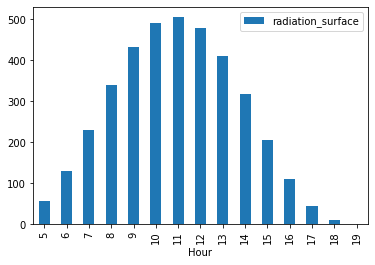

In [14]:
import matplotlib.pyplot as plt

irradiance_hour = irradiance.groupby(irradiance["Hour"]).mean().plot(kind="bar")
plt.show(irradiance_hour)